MODELLING NOTEBOOK

We define the directory where we will be reading the different data files.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

import pandas as pd


Mounted at /content/drive/


We load our "Sonar" dataset generated in Data Preparation.

In [2]:
sonar = pd.read_csv('/content/drive/MyDrive/TAED2/sonar.csv')
sonar

,key,ISSUE_KEY,TYPE,SEVERITY,RESOLUTION,DEBT,MESSAGE,START_OFFSET,END_OFFSET,FIXING_TIME,project_id,complexity,file_complexity,duplicated_lines,duplicated_blocks,duplicated_files,duplicated_lines_density,violations,blocker_violations,critical_violations,major_violations,minor_violations,info_violations,open_issues,missing_package_info,development_cost,sqale_debt_ratio,new_sqale_debt_ratio,code_smells,bugs,reliability_remediation_effort,reliability_rating,vulnerabilities,security_remediation_effort,security_rating,lines,ncloc,ncloc_language_distribution,classes,files,directories,functions,statements,comment_lines,comment_lines_density
0,AWd6nb73C4KKKThc_A3s,AWd6nekaC4KKKThc_A33,CODE_SMELL,MAJOR,FIXED,5.0,Add a nested comment explaining why this metho...,16.0,29.0,490 days 05:26:52,org.apache:cayenne,25889.0,12.0,15116,1493,322,5.2,13163,105,536,6406,5753,363,13163,185,5174850,3.5,0.428380,11613,1438,12508,5,112,1745,4,288771.0,172495.0,"css=236,java=143648,web=14225,xml=14386",2264.0,2355.0,428.0,13879.0,65151.0,21363.0,11.0
1,AWd6tZbeC4KKKThc_By1,AWd6tcxLC4KKKThc_BzZ,BUG,CRITICAL,FIXED,30.0,"Make ""embeddablesMap"" transient or serializable.",22.0,36.0,300 days 05:19:50,org.apache:cayenne,25932.0,12.0,15116,1493,322,5.2,13164,105,538,6405,5754,362,13164,185,5181360,3.5,0.231766,11612,1440,12568,5,112,1745,4,289183.0,172712.0,"css=236,java=143885,web=14225,xml=14366",2268.0,2359.0,428.0,13910.0,65268.0,21389.0,11.0
2,AWd6zCYKC4KKKThc_E2z,AWeFbxElC4KKKThcA-bK,CODE_SMELL,MAJOR,FIXED,90.0,Lazy class,0.0,66.0,220 days 04:16:14,org.apache:cayenne,25981.0,12.0,15116,1493,322,5.2,13194,105,538,6419,5755,377,13194,187,5192910,3.5,1.068211,11642,1440,12568,5,112,1745,4,289877.0,173097.0,"css=236,java=144245,web=14225,xml=14391",2275.0,2365.0,430.0,13949.0,65404.0,21443.0,11.0
3,AWd6zCYKC4KKKThc_E2z,AWeHCUklC4KKKThcBPfg,CODE_SMELL,MAJOR,FIXED,90.0,Lazy class,0.0,66.0,275 days 01:44:09,org.apache:cayenne,25981.0,12.0,15116,1493,322,5.2,13194,105,538,6419,5755,377,13194,187,5192910,3.5,1.068211,11642,1440,12568,5,112,1745,4,289877.0,173097.0,"css=236,java=144245,web=14225,xml=14391",2275.0,2365.0,430.0,13949.0,65404.0,21443.0,11.0
4,AWd6zCYKC4KKKThc_E2z,AWd-kQ1gC4KKKThc_2XC,CODE_SMELL,MAJOR,FIXED,90.0,Lazy class,0.0,66.0,153 days 06:21:48,org.apache:cayenne,25981.0,12.0,15116,1493,322,5.2,13194,105,538,6419,5755,377,13194,187,5192910,3.5,1.068211,11642,1440,12568,5,112,1745,4,289877.0,173097.0,"css=236,java=144245,web=14225,xml=14391",2275.0,2365.0,430.0,13949.0,65404.0,21443.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697597,AWMdGfe8O48jNFNDDtun,AWMdGgFQO48jNFNDDtzK,CODE_SMELL,MINOR,FIXED,1.0,"At most one statement is allowed per line, but...",0.0,109.0,14 days 18:35:48,org.apache:zookeeper,9739.0,20.9,4870,311,101,4.9,4836,18,522,2122,2105,69,4836,25,1973220,3.1,2.176649,4363,32,177,5,441,10795,4,99208.0,65774.0,"java=62021,web=884,xml=2869",772.0,470.0,30.0,4574.0,31057.0,10010.0,13.2
697598,AWMdGfe8O48jNFNDDtun,AWMdGgFRO48jNFNDDtzM,CODE_SMELL,MINOR,FIXED,1.0,"At most one statement is allowed per line, but...",0.0,39.0,14 days 18:35:48,org.apache:zookeeper,9739.0,20.9,4870,311,101,4.9,4836,18,522,2122,2105,69,4836,25,1973220,3.1,2.176649,4363,32,177,5,441,10795,4,99208.0,65774.0,"java=62021,web=884,xml=2869",772.0,470.0,30.0,4574.0,31057.0,10010.0,13.2
697599,AWMdGfe8O48jNFNDDtun,AWMdGgFRO48jNFNDDtzO,CODE_SMELL,MINOR,FIXED,1.0,"At most one statement is allowed per line, but...",0.0,70.0,14 days 18:35:48,org.apache:zookeeper,9739.0,20.9,4870,311,101,4.9,4836,18,522,2122,2105,69,4836,25,1973220,3.1,2.176649,4363,32,177,5,441,10795,4,99208.0,65774.0,"java=62021,web=884,xml=2869",772.0,470.0,30.0,4574.0,31057.0,10010.0,13.2
697600,AWMdGfe8O48jNFNDDtun,AWMdGgFRO48jNFNDDtzP,CODE_SMELL,MINOR,FIXED,90.0,Complex class,0.0,3.0,14 days 18:35:48,org.apache:zookeeper,9739.0,20.9,4870,311,101,4.9,4836,18,5

Some needed libraries and packages...

In [3]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

First, we will be trying a model without the categorical variables in Sonar, thus, we'll only have numerical variables in "sonar_num". We select only the columns without categorical variables.

In [4]:
sonar_num = sonar.loc[:,~sonar.columns.isin(["key","ISSUE_KEY","TYPE","SEVERITY","RESOLUTION","MESSAGE","project_id","ncloc_language_distribution"])]
sonar_num

,DEBT,START_OFFSET,END_OFFSET,FIXING_TIME,complexity,file_complexity,duplicated_lines,duplicated_blocks,duplicated_files,duplicated_lines_density,violations,blocker_violations,critical_violations,major_violations,minor_violations,info_violations,open_issues,missing_package_info,development_cost,sqale_debt_ratio,new_sqale_debt_ratio,code_smells,bugs,reliability_remediation_effort,reliability_rating,vulnerabilities,security_remediation_effort,security_rating,lines,ncloc,classes,files,directories,functions,statements,comment_lines,comment_lines_density
0,5.0,16.0,29.0,490 days 05:26:52,25889.0,12.0,15116,1493,322,5.2,13163,105,536,6406,5753,363,13163,185,5174850,3.5,0.428380,11613,1438,12508,5,112,1745,4,288771.0,172495.0,2264.0,2355.0,428.0,13879.0,65151.0,21363.0,11.0
1,30.0,22.0,36.0,300 days 05:19:50,25932.0,12.0,15116,1493,322,5.2,13164,105,538,6405,5754,362,13164,185,5181360,3.5,0.231766,11612,1440,12568,5,112,1745,4,289183.0,172712.0,2268.0,2359.0,428.0,13910.0,65268.0,21389.0,11.0
2,90.0,0.0,66.0,220 days 04:16:14,25981.0,12.0,15116,1493,322,5.2,13194,105,538,6419,5755,377,13194,187,5192910,3.5,1.068211,11642,1440,12568,5,112,1745,4,289877.0,173097.0,2275.0,2365.0,430.0,13949.0,65404.0,21443.0,11.0
3,90.0,0.0,66.0,275 days 01:44:09,25981.0,12.0,15116,1493,322,5.2,13194,105,538,6419,5755,377,13194,187,5192910,3.5,1.068211,11642,1440,12568,5,112,1745,4,289877.0,173097.0,2275.0,2365.0,430.0,13949.0,65404.0,21443.0,11.0
4,90.0,0.0,66.0,153 days 06:21:48,25981.0,12.0,15116,1493,322,5.2,13194,105,538,6419,5755,377,13194,187,5192910,3.5,1.068211,11642,1440,12568,5,112,1745,4,289877.0,173097.0,2275.0,2365.0,430.0,13949.0,65404.0,21443.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697597,1.0,0.0,109.0,14 days 18:35:48,9739.0,20.9,4870,311,101,4.9,4836,18,522,2122,2105,69,4836,25,1973220,3.1,2.176649,4363,32,177,5,441,10795,4,99208.0,65774.0,772.0,470.0,30.0,4574.0,31057.0,10010.0,13.2
697598,1.0,0.0,39.0,14 days 18:35:48,9739.0,20.9,4870,311,101,4.9,4836,18,522,2122,2105,69,4836,25,1973220,3.1,2.176649,4363,32,177,5,441,10795,4,99208.0,65774.0,772.0,470.0,30.0,4574.0,31057.0,10010.0,13.2
697599,1.0,0.0,70.0,14 days 18:35:48,9739.0,20.9,4870,311,101,4.9,4836,18,522,2122,2105,69,4836,25,1973220,3.1,2.176649,4363,32,177,5,441,10795,4,99208.0,65774.0,772.0,470.0,30.0,4574.0,31057.0,10010.0,13.2
697600,90.0,0.0,3.0,14 days 18:35:48,9739.0,20.9,4870,311,101,4.9,4836,18,522,2122,2105,69,4836,25,1973220,3.1,2.176649,4363,32,177,5,441,10795,4,99208.0,65774.0,772.0,470.0,30.0,4574.0,31057.0,10010.0,13.2


We fix the "FIXING_TIME" variable to be in days with the decimal part.

In [5]:
# convert fixing time to days with decimal part.
from datetime import datetime
sonar_num["FIXING_TIME"] = pd.to_timedelta(sonar_num['FIXING_TIME']).astype('timedelta64[s]')/86400


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


We are going to perform PCA with data scaling with the "numeric" sonar dataset.

In [6]:
# PCA model training with data scaling
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(sonar_num)

pca_model = pca_pipe.named_steps['pca']

In [7]:
import numpy as np
np.where(pca_model.components_[0,:] == max(pca_model.components_[0,:]))

(array([36]),)

We can observe that "comment_lines_density" is the variable that explains the most.

In [8]:
sonar_num.iloc[:,36].name

'comment_lines_density'

In [9]:
np.where(pca_model.components_[1,:] == max(pca_model.components_[1,:]))

(array([2]),)

In [10]:
sonar_num.iloc[:,2].name

'END_OFFSET'

In [11]:
np.where(pca_model.components_[2,:] == max(pca_model.components_[2,:]))

(array([9]),)

In [12]:
sonar_num.iloc[:,9].name

'duplicated_lines_density'

We can plot a heatmap to check which variables are more significant in the dataset.

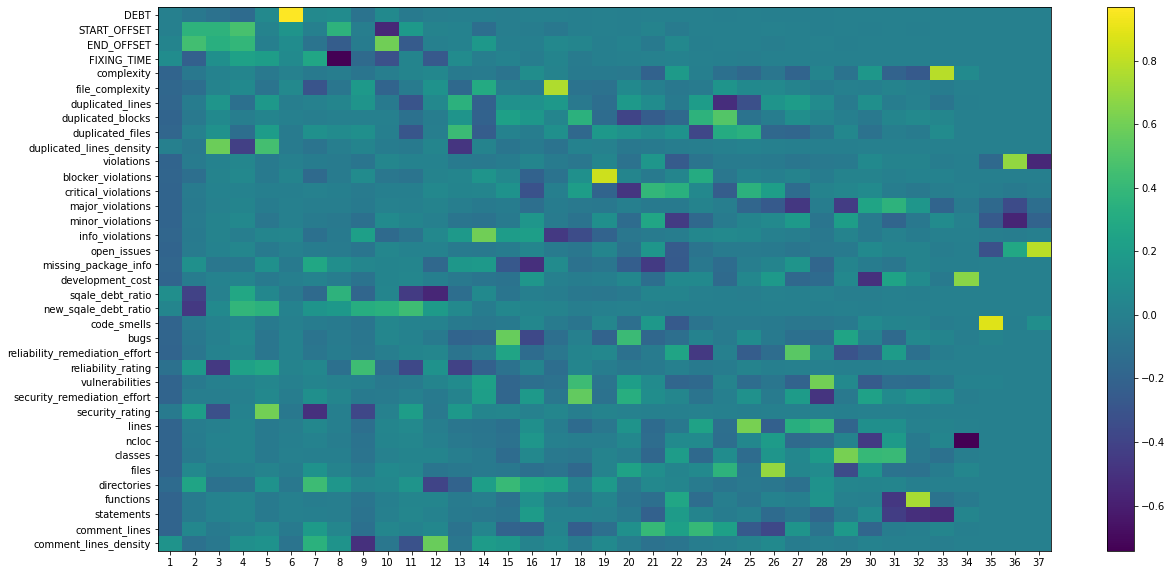

In [13]:
# Heatmap components
# ==============================================================================
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
components = pca_model.components_
plt.imshow(components.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(sonar_num.columns)), sonar_num.columns)
plt.xticks(range(len(sonar_num.columns)), np.arange(pca_model.n_components_) + 1)
plt.grid(False)
plt.colorbar();

Let's see how much variance is explained by each component.

----------------------------------------------------
Variance percentage explained by each component
----------------------------------------------------
[7.10162772e-01 4.73765954e-02 3.70663556e-02 3.58611759e-02
 2.97901736e-02 2.69211709e-02 2.38999017e-02 1.94474314e-02
 1.57633867e-02 1.38616274e-02 1.05823869e-02 9.84750017e-03
 5.63041365e-03 3.55841070e-03 3.08348467e-03 1.84296751e-03
 1.74499162e-03 9.70989620e-04 6.23854425e-04 5.25536990e-04
 3.66680089e-04 2.93484605e-04 2.65494641e-04 1.86697187e-04
 9.71536149e-05 7.49367665e-05 6.41451230e-05 4.49256796e-05
 1.60566615e-05 1.40433461e-05 7.76331538e-06 4.60717553e-06
 2.57540755e-06 3.09794129e-07 4.44929983e-33 4.44929983e-33
 4.44929983e-33]


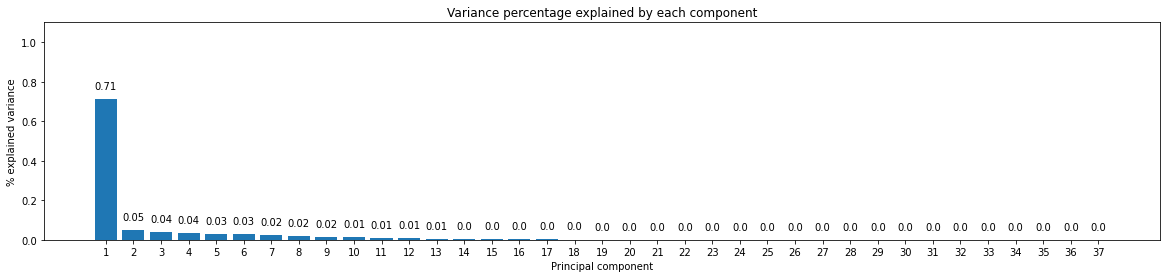

In [14]:
# Variance percentage explained by each component
# ==============================================================================
print('----------------------------------------------------')
print('Variance percentage explained by each component')
print('----------------------------------------------------')
print(pca_model.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
ax.bar(
    x      = np.arange(pca_model.n_components_) + 1,
    height = pca_model.explained_variance_ratio_
)

for x, y in zip(np.arange(len(sonar_num.columns)) + 1, pca_model.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca_model.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Variance percentage explained by each component')
ax.set_xlabel('Principal component')
ax.set_ylabel('% explained variance');

We can see that nearly the total variance is explained by a single component. The rest of components are insignificant.

------------------------------------------
Cumulative explained variance percentage
------------------------------------------
[0.71016277 0.75753937 0.79460572 0.8304669  0.86025707 0.88717824
 0.91107814 0.93052558 0.94628896 0.96015059 0.97073298 0.98058048
 0.98621089 0.9897693  0.99285279 0.99469575 0.99644075 0.99741174
 0.99803559 0.99856113 0.99892781 0.99922129 0.99948679 0.99967348
 0.99977064 0.99984557 0.99990972 0.99995464 0.9999707  0.99998474
 0.99999251 0.99999711 0.99999969 1.         1.         1.
 1.        ]


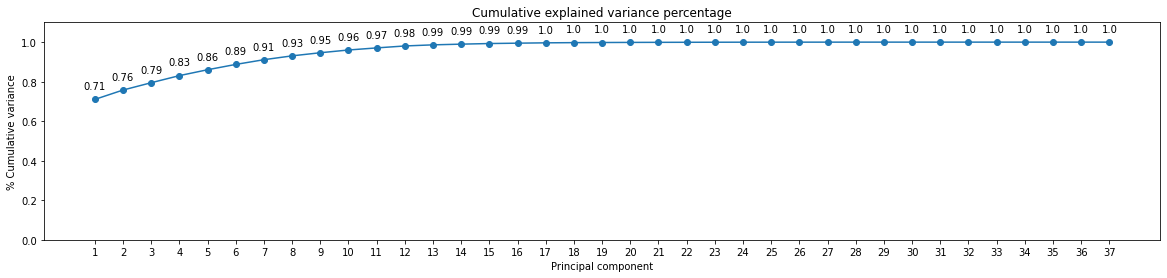

In [15]:
# Cumulative explained variance percentage
# ==============================================================================
prop_cum_var = pca_model.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Cumulative explained variance percentage')
print('------------------------------------------')
print(prop_cum_var)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
ax.plot(
    np.arange(len(sonar_num.columns)) + 1,
    prop_cum_var,
    marker = 'o'
)

for x, y in zip(np.arange(len(sonar_num.columns)) + 1, prop_cum_var):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca_model.n_components_) + 1)
ax.set_title('Cumulative explained variance percentage')
ax.set_xlabel('Principal component')
ax.set_ylabel('% Cumulative variance');

With at least 7 components, we can explain. the 90% of the variance.

Now, let's perform a Principal Components Regression using the PCA applied before.

We load more packages and functions.

In [16]:
# PCR
import statsmodels.api as sm

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import multiprocessing

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
# Correlation between numeric columns
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Converts pandas correlation matrix to tidy format.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = sonar_num.corr(method='pearson')
display(tidy_corr_matrix(corr_matrix).head(20))

,variable_1,variable_2,r,abs_r
386,violations,open_issues,1.000000,1.000000
602,open_issues,violations,1.000000,1.000000
695,development_cost,ncloc,0.999978,0.999978
1091,ncloc,development_cost,0.999978,0.999978
793,code_smells,open_issues,0.999977,0.999977
787,code_smells,violations,0.999977,0.999977
391,violations,code_smells,0.999977,0.999977
613,open_issues,code_smells,0.999977,0.999977
1143,classes,functions,0.998950,0.998950
1251,functions,classes,0.998950,0.998950


If we look at the correlations between the variables, we can observe that they are highly correlated, thus dependent between them. That's why at the end of the notebook, we perform a Ridge Regression model since it's good in these cases where data is dependent.

We prepare the dataset to train the model. We will try to predict the variable 'DEBT'.

In [18]:
# Splitting train and test data
# ==============================================================================
X = sonar_num.drop(columns='new_sqale_debt_ratio')
y = sonar_num['new_sqale_debt_ratio']

X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),
    train_size   = 0.7, random_state = 1234, shuffle = True)

Ordinary Least Squares (OLS):

In [19]:
# Minimum squares (OLS)

# Cration and training of the model
# ==============================================================================
model = LinearRegression(normalize=True)
model.fit(X = X_train, y = y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [20]:
# Test predictions
# ==============================================================================
predictions = model.predict(X=X_test)
predictions = predictions.flatten()

# Model test error
# ==============================================================================
rmse_ols = mean_squared_error(y_true = y_test,y_pred = predictions, squared = False)

print(f"Test error (rmse) is : {rmse_ols}")

Test error (rmse) is : 0.8740970740915138


The model predictions far 46.34 units on average from the real value. This error is high given that the target variable ranges from low values to high ones, but they are mainly concentrated in lower values. Later on, we will be trying to predict another variable related to the Technical Debt that is "new_sqale_ratio" and doesn't have a big range.

In [21]:
# PCR
# Training regression model preceded by PCA with scaling.
# ==============================================================================
modeling_pipe = make_pipeline(StandardScaler(), PCA(), LinearRegression())
modeling_pipe.fit(X=X_train, y=y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [22]:
# INCLUDING ALL COMPONENTS
# Test predictions
# ==============================================================================
predictions = modeling_pipe.predict(X=X_test)
predictions = predictions.flatten()

# Model Test error
# ==============================================================================
rmse_pcr = mean_squared_error(y_true  = y_test, y_pred  = predictions, squared = False)
print(f"The test error (rmse) is: {rmse_pcr}")

The test error (rmse) is: 0.8740971895056788


We tune the hyperparameters, that is only the number of principal components.

In [23]:
# Grid of evaluted hyperparameters.
# ==============================================================================
param_grid = {'pca__n_components': [1, 2, 4, 6, 8, 10, 15, 20, 30, 35]}

# Search by grid search with cross validation.
# ==============================================================================
grid = GridSearchCV(
        estimator  = modeling_pipe,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = KFold(n_splits=5, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Results
# ==============================================================================
results = pd.DataFrame(grid.cv_results_)
results.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


,param_pca__n_components,mean_test_score,std_test_score,mean_train_score,std_train_score
9,35,-0.894019,0.019223,-0.894017,0.004797
8,30,-0.898410,0.019018,-0.898421,0.004752
7,20,-0.904082,0.019139,-0.904149,0.004788
6,15,-0.908425,0.019204,-0.908564,0.004798
5,10,-0.919531,0.019050,-0.919673,0.004783
4,8,-0.940936,0.018838,-0.941062,0.004653
3,6,-0.989295,0.015893,-0.989323,0.005070
2,4,-1.031790,0.014202,-1.031843,0.003554
1,2,-1.051966,0.014288,-1.052033,0.003531
0,1,-1.082861,0.013543,-1.082936,0.003380


We can observe that the improvements when we have more components are insignificant.

We plot the cross validation results for each hyperparamter.

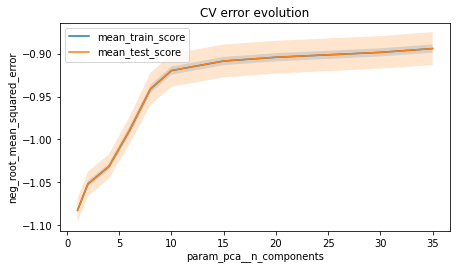

In [24]:
# Plot of the cross validation results for each hyperparameter.
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.84), sharey=True)

results.plot('param_pca__n_components', 'mean_train_score', ax=ax)
results.plot('param_pca__n_components', 'mean_test_score', ax=ax)
ax.fill_between(results.param_pca__n_components.astype(np.float),
                results['mean_train_score'] + results['std_train_score'],
                results['mean_train_score'] - results['std_train_score'],
                alpha=0.2)
ax.fill_between(results.param_pca__n_components.astype(np.float),
                results['mean_test_score'] + results['std_test_score'],
                results['mean_test_score'] - results['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('CV error evolution')
ax.set_ylabel('neg_root_mean_squared_error');

The regression model with only 4 components.

In [25]:
# Training regression model after PCA with scaling.
# ==============================================================================
modeling_pipe = make_pipeline(StandardScaler(), PCA(n_components=4), LinearRegression())
modeling_pipe.fit(X=X_train, y=y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=4,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [26]:
# Test predictions
# ==============================================================================
predictions = modeling_pipe.predict(X=X_test)
predictions = predictions.flatten()

# Model test error
# ==============================================================================
rmse_pcr = mean_squared_error(
            y_true  = y_test,
            y_pred  = predictions,
            squared = False
           )
print(f"The test error (rmse) is: {rmse_pcr}")

The test error (rmse) is: 1.010513879860335


Now, we include the categorical variables previously deleted. We encode them using One Hot Encoding, so we can perform a regression.

In [27]:
# ONE HOT ENCODING FOR CATEGORICAL VARIABLES
sonar_one = sonar.loc[:,~sonar.columns.isin(["key","ISSUE_KEY","RESOLUTION","MESSAGE","project_id","ncloc_language_distribution"])]
sonar_one

,TYPE,SEVERITY,DEBT,START_OFFSET,END_OFFSET,FIXING_TIME,complexity,file_complexity,duplicated_lines,duplicated_blocks,duplicated_files,duplicated_lines_density,violations,blocker_violations,critical_violations,major_violations,minor_violations,info_violations,open_issues,missing_package_info,development_cost,sqale_debt_ratio,new_sqale_debt_ratio,code_smells,bugs,reliability_remediation_effort,reliability_rating,vulnerabilities,security_remediation_effort,security_rating,lines,ncloc,classes,files,directories,functions,statements,comment_lines,comment_lines_density
0,CODE_SMELL,MAJOR,5.0,16.0,29.0,490 days 05:26:52,25889.0,12.0,15116,1493,322,5.2,13163,105,536,6406,5753,363,13163,185,5174850,3.5,0.428380,11613,1438,12508,5,112,1745,4,288771.0,172495.0,2264.0,2355.0,428.0,13879.0,65151.0,21363.0,11.0
1,BUG,CRITICAL,30.0,22.0,36.0,300 days 05:19:50,25932.0,12.0,15116,1493,322,5.2,13164,105,538,6405,5754,362,13164,185,5181360,3.5,0.231766,11612,1440,12568,5,112,1745,4,289183.0,172712.0,2268.0,2359.0,428.0,13910.0,65268.0,21389.0,11.0
2,CODE_SMELL,MAJOR,90.0,0.0,66.0,220 days 04:16:14,25981.0,12.0,15116,1493,322,5.2,13194,105,538,6419,5755,377,13194,187,5192910,3.5,1.068211,11642,1440,12568,5,112,1745,4,289877.0,173097.0,2275.0,2365.0,430.0,13949.0,65404.0,21443.0,11.0
3,CODE_SMELL,MAJOR,90.0,0.0,66.0,275 days 01:44:09,25981.0,12.0,15116,1493,322,5.2,13194,105,538,6419,5755,377,13194,187,5192910,3.5,1.068211,11642,1440,12568,5,112,1745,4,289877.0,173097.0,2275.0,2365.0,430.0,13949.0,65404.0,21443.0,11.0
4,CODE_SMELL,MAJOR,90.0,0.0,66.0,153 days 06:21:48,25981.0,12.0,15116,1493,322,5.2,13194,105,538,6419,5755,377,13194,187,5192910,3.5,1.068211,11642,1440,12568,5,112,1745,4,289877.0,173097.0,2275.0,2365.0,430.0,13949.0,65404.0,21443.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697597,CODE_SMELL,MINOR,1.0,0.0,109.0,14 days 18:35:48,9739.0,20.9,4870,311,101,4.9,4836,18,522,2122,2105,69,4836,25,1973220,3.1,2.176649,4363,32,177,5,441,10795,4,99208.0,65774.0,772.0,470.0,30.0,4574.0,31057.0,10010.0,13.2
697598,CODE_SMELL,MINOR,1.0,0.0,39.0,14 days 18:35:48,9739.0,20.9,4870,311,101,4.9,4836,18,522,2122,2105,69,4836,25,1973220,3.1,2.176649,4363,32,177,5,441,10795,4,99208.0,65774.0,772.0,470.0,30.0,4574.0,31057.0,10010.0,13.2
697599,CODE_SMELL,MINOR,1.0,0.0,70.0,14 days 18:35:48,9739.0,20.9,4870,311,101,4.9,4836,18,522,2122,2105,69,4836,25,1973220,3.1,2.176649,4363,32,177,5,441,10795,4,99208.0,65774.0,772.0,470.0,30.0,4574.0,31057.0,10010.0,13.2
697600,CODE_SMELL,MINOR,90.0,0.0,3.0,14 days 18:35:48,9739.0,20.9,4870,311,101,4.9,4836,18,522,2122,2105,69,4836,25,1973220,3.1,2.176649,4363,32,177,5,441,10795,4,99208.0,65774.0,772.0,470.0,30.0,4574.0,31057.0,10010.0,13.2


We add the different columns for each value, so we can have the correct one hot encoding.

In [28]:
type_one = pd.get_dummies(sonar_one['TYPE'],prefix='TYPE')
sonar_one['TYPE_BUG'] = type_one['TYPE_BUG']
sonar_one['TYPE_CODE_SMELL'] = type_one['TYPE_CODE_SMELL']
sonar_one['TYPE_VULNERABILITY'] = type_one['TYPE_VULNERABILITY']
sonar_one = sonar_one.loc[:,~sonar_one.columns.isin(["TYPE"])]
sonar_one

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,SEVERITY,DEBT,START_OFFSET,END_OFFSET,FIXING_TIME,complexity,file_complexity,duplicated_lines,duplicated_blocks,duplicated_files,duplicated_lines_density,violations,blocker_violations,critical_violations,major_violations,minor_violations,info_violations,open_issues,missing_package_info,development_cost,sqale_debt_ratio,new_sqale_debt_ratio,code_smells,bugs,reliability_remediation_effort,reliability_rating,vulnerabilities,security_remediation_effort,security_rating,lines,ncloc,classes,files,directories,functions,statements,comment_lines,comment_lines_density,TYPE_BUG,TYPE_CODE_SMELL,TYPE_VULNERABILITY
0,MAJOR,5.0,16.0,29.0,490 days 05:26:52,25889.0,12.0,15116,1493,322,5.2,13163,105,536,6406,5753,363,13163,185,5174850,3.5,0.428380,11613,1438,12508,5,112,1745,4,288771.0,172495.0,2264.0,2355.0,428.0,13879.0,65151.0,21363.0,11.0,0,1,0
1,CRITICAL,30.0,22.0,36.0,300 days 05:19:50,25932.0,12.0,15116,1493,322,5.2,13164,105,538,6405,5754,362,13164,185,5181360,3.5,0.231766,11612,1440,12568,5,112,1745,4,289183.0,172712.0,2268.0,2359.0,428.0,13910.0,65268.0,21389.0,11.0,1,0,0
2,MAJOR,90.0,0.0,66.0,220 days 04:16:14,25981.0,12.0,15116,1493,322,5.2,13194,105,538,6419,5755,377,13194,187,5192910,3.5,1.068211,11642,1440,12568,5,112,1745,4,289877.0,173097.0,2275.0,2365.0,430.0,13949.0,65404.0,21443.0,11.0,0,1,0
3,MAJOR,90.0,0.0,66.0,275 days 01:44:09,25981.0,12.0,15116,1493,322,5.2,13194,105,538,6419,5755,377,13194,187,5192910,3.5,1.068211,11642,1440,12568,5,112,1745,4,289877.0,173097.0,2275.0,2365.0,430.0,13949.0,65404.0,21443.0,11.0,0,1,0
4,MAJOR,90.0,0.0,66.0,153 days 06:21:48,25981.0,12.0,15116,1493,322,5.2,13194,105,538,6419,5755,377,13194,187,5192910,3.5,1.068211,11642,1440,12568,5,112,1745,4,289877.0,173097.0,2275.0,2365.0,430.0,13949.0,65404.0,21443.0,11.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697597,MINOR,1.0,0.0,109.0,14 days 18:35:48,9739.0,20.9,4870,311,101,4.9,4836,18,522,2122,2105,69,4836,25,1973220,3.1,2.176649,4363,32,177,5,441,10795,4,99208.0,65774.0,772.0,470.0,30.0,4574.0,31057.0,10010.0,13.2,0,1,0
697598,MINOR,1.0,0.0,39.0,14 days 18:35:48,9739.0,20.9,4870,311,101,4.9,4836,18,522,2122,2105,69,4836,25,1973220,3.1,2.176649,4363,32,177,5,441,10795,4,99208.0,65774.0,772.0,470.0,30.0,4574.0,31057.0,10010.0,13.2,0,1,0
697599,MINOR,1.0,0.0,70.0,14 days 18:35:48,9739.0,20.9,4870,311,101,4.9,4836,18,522,2122,2105,69,4836,25,1973220,3.1,2.176649,4363,32,177,5,441,10795,4,99208.0,65774.0,772.0,470.0,30.0,4574.0,31057.0,10010.0,13.2,0,1,0
697600,MINOR,90.0,0.0,3.0,14 days 18:35:48,9739.0,20.9,4870,311,101,4.9,4836,18,522,2122,2105,69,4836,25,1973220,3.1,2.176649,4363,32,177,5,441,10795,4,99208.0,65774.0,772.0,470.0,30.0,4574.0,31057.0,10010.0,13.2,0,1,0


In [29]:
severity_one = pd.get_dummies(sonar_one['SEVERITY'],prefix='SEVERITY')
sonar_one['SEVERITY_BLOCKER'] = severity_one['SEVERITY_BLOCKER']
sonar_one['SEVERITY_CRITICAL'] = severity_one['SEVERITY_CRITICAL']
sonar_one['SEVERITY_INFO'] = severity_one['SEVERITY_INFO']
sonar_one['SEVERITY_MAJOR'] = severity_one['SEVERITY_MAJOR']
sonar_one['SEVERITY_MINOR'] = severity_one['SEVERITY_MINOR']
sonar_one = sonar_one.loc[:,~sonar_one.columns.isin(["SEVERITY"])]
sonar_one

,DEBT,START_OFFSET,END_OFFSET,FIXING_TIME,complexity,file_complexity,duplicated_lines,duplicated_blocks,duplicated_files,duplicated_lines_density,violations,blocker_violations,critical_violations,major_violations,minor_violations,info_violations,open_issues,missing_package_info,development_cost,sqale_debt_ratio,new_sqale_debt_ratio,code_smells,bugs,reliability_remediation_effort,reliability_rating,vulnerabilities,security_remediation_effort,security_rating,lines,ncloc,classes,files,directories,functions,statements,comment_lines,comment_lines_density,TYPE_BUG,TYPE_CODE_SMELL,TYPE_VULNERABILITY,SEVERITY_BLOCKER,SEVERITY_CRITICAL,SEVERITY_INFO,SEVERITY_MAJOR,SEVERITY_MINOR
0,5.0,16.0,29.0,490 days 05:26:52,25889.0,12.0,15116,1493,322,5.2,13163,105,536,6406,5753,363,13163,185,5174850,3.5,0.428380,11613,1438,12508,5,112,1745,4,288771.0,172495.0,2264.0,2355.0,428.0,13879.0,65151.0,21363.0,11.0,0,1,0,0,0,0,1,0
1,30.0,22.0,36.0,300 days 05:19:50,25932.0,12.0,15116,1493,322,5.2,13164,105,538,6405,5754,362,13164,185,5181360,3.5,0.231766,11612,1440,12568,5,112,1745,4,289183.0,172712.0,2268.0,2359.0,428.0,13910.0,65268.0,21389.0,11.0,1,0,0,0,1,0,0,0
2,90.0,0.0,66.0,220 days 04:16:14,25981.0,12.0,15116,1493,322,5.2,13194,105,538,6419,5755,377,13194,187,5192910,3.5,1.068211,11642,1440,12568,5,112,1745,4,289877.0,173097.0,2275.0,2365.0,430.0,13949.0,65404.0,21443.0,11.0,0,1,0,0,0,0,1,0
3,90.0,0.0,66.0,275 days 01:44:09,25981.0,12.0,15116,1493,322,5.2,13194,105,538,6419,5755,377,13194,187,5192910,3.5,1.068211,11642,1440,12568,5,112,1745,4,289877.0,173097.0,2275.0,2365.0,430.0,13949.0,65404.0,21443.0,11.0,0,1,0,0,0,0,1,0
4,90.0,0.0,66.0,153 days 06:21:48,25981.0,12.0,15116,1493,322,5.2,13194,105,538,6419,5755,377,13194,187,5192910,3.5,1.068211,11642,1440,12568,5,112,1745,4,289877.0,173097.0,2275.0,2365.0,430.0,13949.0,65404.0,21443.0,11.0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697597,1.0,0.0,109.0,14 days 18:35:48,9739.0,20.9,4870,311,101,4.9,4836,18,522,2122,2105,69,4836,25,1973220,3.1,2.176649,4363,32,177,5,441,10795,4,99208.0,65774.0,772.0,470.0,30.0,4574.0,31057.0,10010.0,13.2,0,1,0,0,0,0,0,1
697598,1.0,0.0,39.0,14 days 18:35:48,9739.0,20.9,4870,311,101,4.9,4836,18,522,2122,2105,69,4836,25,1973220,3.1,2.176649,4363,32,177,5,441,10795,4,99208.0,65774.0,772.0,470.0,30.0,4574.0,31057.0,10010.0,13.2,0,1,0,0,0,0,0,1
697599,1.0,0.0,70.0,14 days 18:35:48,9739.0,20.9,4870,311,101,4.9,4836,18,522,2122,2105,69,4836,25,1973220,3.1,2.176649,4363,32,177,5,441,10795,4,99208.0,65774.0,772.0,470.0,30.0,4574.0,31057.0,10010.0,13.2,0,1,0,0,0,0,0,1
697600,90.0,0.0,3.0,14 days 18:35:48,9739.0,20.9,4870,311,101,4.9,4836,18,522,2122,2105,69,4836,25,1973220,3.1,2.176649,4363,32,177,5,441,10795,4,99208.0,65774.0,772.0,470.0,30.0,4574.0,31057.0,10010.0,13.2,0,1,0,0,0,0,0,1


We fix the "FIXING_TIME" as before.

In [30]:
# convert fixing time to days with decimal part.
from datetime import datetime
sonar_one["FIXING_TIME"] = pd.to_timedelta(sonar_one['FIXING_TIME']).astype('timedelta64[s]')/86400

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
# Training PCA model with data scaling.
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(sonar_one)

pca_model_one = pca_pipe.named_steps['pca']

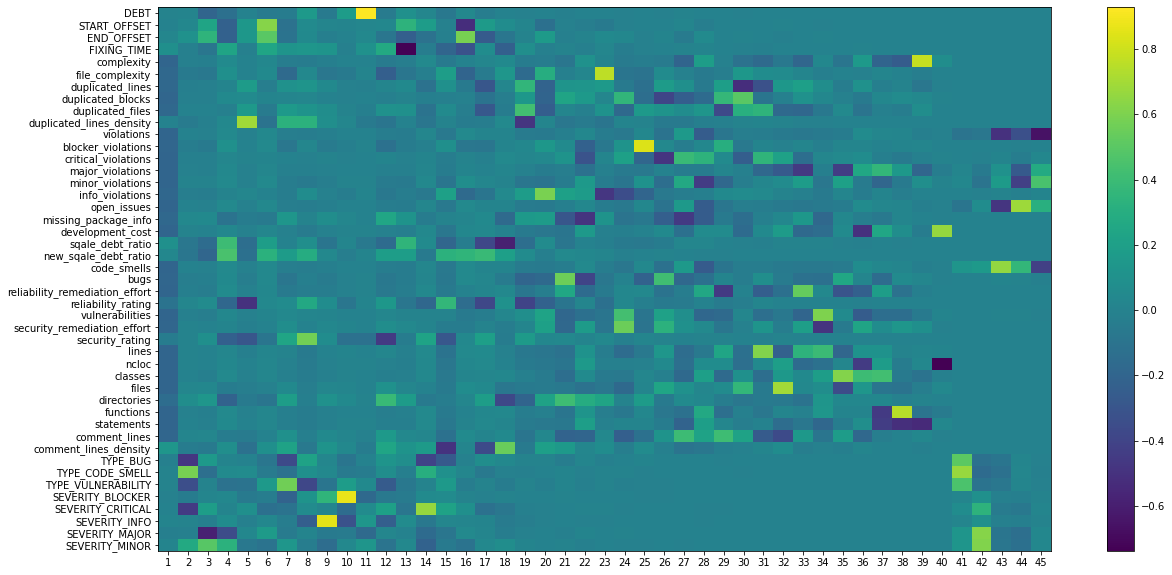

In [32]:
# Components' heatmap
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
components = pca_model_one.components_
plt.imshow(components.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(sonar_one.columns)), sonar_one.columns)
plt.xticks(range(len(sonar_one.columns)), np.arange(pca_model_one.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Variance percentage explained by each component.
----------------------------------------------------
[5.84436953e-01 5.54210591e-02 4.52082401e-02 3.58852293e-02
 3.05474371e-02 2.92025958e-02 2.58550946e-02 2.39059926e-02
 2.26477994e-02 2.22495545e-02 2.10576189e-02 1.85415453e-02
 1.59168909e-02 1.35506664e-02 1.23752522e-02 1.10177803e-02
 8.54953936e-03 7.79340617e-03 4.60552517e-03 2.91584304e-03
 2.49066186e-03 1.48804342e-03 1.43003916e-03 7.92468623e-04
 5.04734500e-04 4.31086124e-04 3.01136706e-04 2.40382855e-04
 2.17463016e-04 1.52679222e-04 7.94460502e-05 6.13210168e-05
 5.25786772e-05 3.67876654e-05 1.31748522e-05 1.14970745e-05
 6.34422837e-06 3.76595594e-06 2.11079205e-06 2.54491076e-07
 1.15259866e-31 6.20120062e-33 3.17784619e-33 3.17784619e-33
 3.17784619e-33]


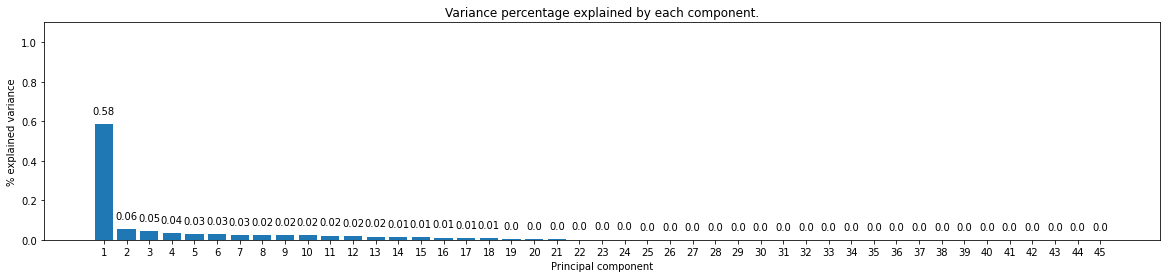

In [33]:
# Variance percentage explained by each component.
# ==============================================================================
print('----------------------------------------------------')
print('Variance percentage explained by each component.')
print('----------------------------------------------------')
print(pca_model_one.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
ax.bar(
    x      = np.arange(pca_model_one.n_components_) + 1,
    height = pca_model_one.explained_variance_ratio_
)

for x, y in zip(np.arange(len(sonar_one.columns)) + 1, pca_model_one.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca_model_one.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Variance percentage explained by each component.')
ax.set_xlabel('Principal component')
ax.set_ylabel('% explained variance');

Now, the principal components does not explain as much as before, but this is due to the fact that we have more columns in the data now.

------------------------------------------
Cumulative percentage of explained variance.
------------------------------------------
[0.58443695 0.63985801 0.68506625 0.72095148 0.75149892 0.78070151
 0.80655661 0.8304626  0.8531104  0.87535996 0.89641757 0.91495912
 0.93087601 0.94442668 0.95680193 0.96781971 0.97636925 0.98416266
 0.98876818 0.99168402 0.99417469 0.99566273 0.99709277 0.99788524
 0.99838997 0.99882106 0.99912219 0.99936258 0.99958004 0.99973272
 0.99981217 0.99987349 0.99992606 0.99996285 0.99997603 0.99998752
 0.99999387 0.99999763 0.99999975 1.         1.         1.
 1.         1.         1.        ]


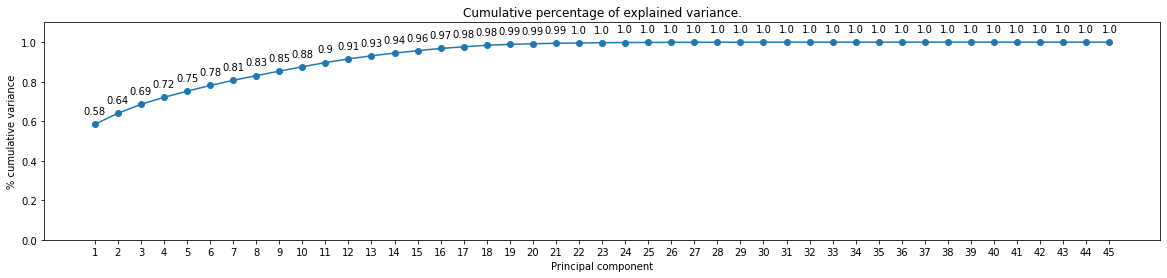

In [34]:
# Cumulative percentage of explained variance.
# ==============================================================================
prop_cum_var = pca_model_one.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Cumulative percentage of explained variance.')
print('------------------------------------------')
print(prop_cum_var)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
ax.plot(
    np.arange(len(sonar_one.columns)) + 1,
    prop_cum_var,
    marker = 'o'
)

for x, y in zip(np.arange(len(sonar_one.columns)) + 1, prop_cum_var):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca_model_one.n_components_) + 1)
ax.set_title('Cumulative percentage of explained variance.')
ax.set_xlabel('Principal component')
ax.set_ylabel('% cumulative variance');


In [35]:
# Correlation between numeric columns.
# ==============================================================================
corr_matrix = sonar_one.corr(method='pearson')
display(tidy_corr_matrix(corr_matrix).head(10))

,variable_1,variable_2,r,abs_r
730,open_issues,violations,1.000000,1.000000
466,violations,open_issues,1.000000,1.000000
839,development_cost,ncloc,0.999978,0.999978
1323,ncloc,development_cost,0.999978,0.999978
741,open_issues,code_smells,0.999977,0.999977
961,code_smells,open_issues,0.999977,0.999977
471,violations,code_smells,0.999977,0.999977
955,code_smells,violations,0.999977,0.999977
1515,functions,classes,0.998950,0.998950
1383,classes,functions,0.998950,0.998950


As mentioned before, since now, our target variable is "new_sqale_debt_ratio".

In [36]:
# Spliting into train and test set.
# ==============================================================================
X = sonar_one.drop(columns='new_sqale_debt_ratio')
y = sonar_one['new_sqale_debt_ratio']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

Applying Least Squares.

In [37]:
# Minimum squares (OLS)
# Training model.
# ==============================================================================
model = LinearRegression(normalize=True)
model.fit(X = X_train, y = y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [38]:
# Test predictions
# ==============================================================================
predictions = model.predict(X=X_test)
predictions = predictions.flatten()

# Model test error.
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predictions,
            squared = False
           )
print(f"The error test (rmse) is: {rmse_ols}")

The error test (rmse) is: 0.8738696816951032


The error is quite low.

In [39]:
# PCR
# Training regression model after PCA with scaling.
# ==============================================================================
modeling_pipe = make_pipeline(StandardScaler(), PCA(), LinearRegression())
modeling_pipe.fit(X=X_train, y=y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [40]:
# Test predictions.
# ==============================================================================
predictions = modeling_pipe.predict(X=X_test)
predictions = predictions.flatten()

# Model test error
# ==============================================================================
rmse_pcr = mean_squared_error(
            y_true  = y_test,
            y_pred  = predictions,
            squared = False
           )
print(f"The test error (rmse) is: {rmse_pcr}")

The test error (rmse) is: 0.8738770022725192


In [41]:
# Grid of evaluated hyperparamters.
# ==============================================================================
param_grid = {'pca__n_components': [1, 2, 4, 6, 8, 10, 15, 20, 30, 40]}

# Search by grid search with cross validation.
# ==============================================================================
grid = GridSearchCV(
        estimator  = modeling_pipe,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = KFold(n_splits=5, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Results
# ==============================================================================
results = pd.DataFrame(grid.cv_results_)
results.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


,param_pca__n_components,mean_test_score,std_test_score,mean_train_score,std_train_score
9,40,-0.893936,0.019255,-0.893922,0.004815
8,30,-0.902572,0.018962,-0.902582,0.004740
7,20,-0.911313,0.019368,-0.911445,0.004831
6,15,-0.933302,0.018991,-0.933419,0.004628
5,10,-1.017101,0.012053,-1.016219,0.008217
4,8,-1.027124,0.014361,-1.027143,0.003696
3,6,-1.034213,0.014288,-1.034274,0.003593
2,4,-1.052300,0.014221,-1.052374,0.003542
1,2,-1.080177,0.013637,-1.080252,0.003415
0,1,-1.082915,0.013541,-1.082990,0.003380


4/6 components seem sufficient.

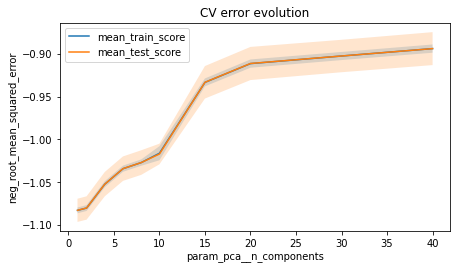

In [42]:
# Plot of cross validation results for each hyperparameter.
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.84), sharey=True)

results.plot('param_pca__n_components', 'mean_train_score', ax=ax)
results.plot('param_pca__n_components', 'mean_test_score', ax=ax)
ax.fill_between(results.param_pca__n_components.astype(np.float),
                results['mean_train_score'] + results['std_train_score'],
                results['mean_train_score'] - results['std_train_score'],
                alpha=0.2)
ax.fill_between(results.param_pca__n_components.astype(np.float),
                results['mean_test_score'] + results['std_test_score'],
                results['mean_test_score'] - results['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('CV error evolution')
ax.set_ylabel('neg_root_mean_squared_error');

In [43]:
# Best hyperparameters by CV
# ==============================================================================
print("----------------------------------------")
print("Best hyperparameters (CV)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Best hyperparameters (CV)
----------------------------------------
{'pca__n_components': 40} : -0.8939361406538829 neg_root_mean_squared_error


In [44]:
# Training regression model after PCA with scaling.
# ==============================================================================
modeling_pipe = make_pipeline(StandardScaler(), PCA(n_components=4), LinearRegression())
modeling_pipe.fit(X=X_train, y=y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=4,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [45]:
# Test predictions
# ==============================================================================
predictions = modeling_pipe.predict(X=X_test)
predictions = predictions.flatten()

# Model test error
# ==============================================================================
rmse_pcr = mean_squared_error(
            y_true  = y_test,
            y_pred  = predictions,
            squared = False
           )
print("")
print(f"The test error (rmse) is: {rmse_pcr}")


The test error (rmse) is: 1.0300182771268807


We want to see now if using a Ridge Regression improve the previous results, given that the variables are highly correlated.

In [46]:
# RIDGE REGESSION
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import numpy as np

We do the One Hot Encoding for the categorical variables as before.

In [47]:
sonar_one = sonar.loc[:,~sonar.columns.isin(["key","ISSUE_KEY","RESOLUTION","MESSAGE","project_id","ncloc_language_distribution"])]
type_one = pd.get_dummies(sonar_one['TYPE'],prefix='TYPE')
sonar_one['TYPE_BUG'] = type_one['TYPE_BUG']
sonar_one['TYPE_CODE_SMELL'] = type_one['TYPE_CODE_SMELL']
sonar_one['TYPE_VULNERABILITY'] = type_one['TYPE_VULNERABILITY']
sonar_one = sonar_one.loc[:,~sonar_one.columns.isin(["TYPE"])]
severity_one = pd.get_dummies(sonar_one['SEVERITY'],prefix='SEVERITY')
sonar_one['SEVERITY_BLOCKER'] = severity_one['SEVERITY_BLOCKER']
sonar_one['SEVERITY_CRITICAL'] = severity_one['SEVERITY_CRITICAL']
sonar_one['SEVERITY_INFO'] = severity_one['SEVERITY_INFO']
sonar_one['SEVERITY_MAJOR'] = severity_one['SEVERITY_MAJOR']
sonar_one['SEVERITY_MINOR'] = severity_one['SEVERITY_MINOR']
sonar_one = sonar_one.loc[:,~sonar_one.columns.isin(["SEVERITY"])]
# convert fixing time to days with decimal part.
from datetime import datetime
sonar_one["FIXING_TIME"] = pd.to_timedelta(sonar_one['FIXING_TIME']).astype('timedelta64[s]')/86400

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [48]:
# evaluate ridge regression model on the dataset

# load the dataset
X = sonar_one.drop(columns='new_sqale_debt_ratio')
y = sonar_one['new_sqale_debt_ratio']
# define model
model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 0.352 (0.003)


We can say that the results for the Ridge Regression are good, the MAE is very low.

If we introduced a new record we could predict its technical debt ratio, based on the previous model.

In [49]:
# WE CAN MAKE PREDICTIONS WITH NEW DATA.
# define new data
row = [...]
# make a prediction
yhat = model.predict([row])
# summarize prediction
print('Predicted: %.3f' % yhat)

NotFittedError: ignored

We can perform a Grid Search for the hyperparameters in order to tune them to get the best possible results.
We can tune the alpha parameter of the Ridge Regression. It can be seen, that the values tried for it range from 0 to 1, with a 0.01 step.

In [ ]:
# TUNING RIDGE HYPERPARAMETERS.
# grid search hyperparameters for ridge regression
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
# load the dataset
X = sonar_one.drop(columns='new_sqale_debt_ratio')
y = sonar_one['new_sqale_debt_ratio']
# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Finally, the results are the same as before, given that the alpha value used before was 1. Now the best results are obtained with hyperparameter alpha = 0.99 ≈ 1.